<a href="https://colab.research.google.com/github/Far0311/Data-Analysis-with-Phyton/blob/main/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Explore Data

In [96]:
# Import libraries
import pandas as pd

In [97]:
# load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [98]:
# display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Preprocessing
Handling Missing Values

In [99]:
# Convert 'TotalCharges' to numeric (handling errors if any values are non-numeric)
# The errors='coerce' argument in pd.to_numeric() is used to handle cases where the column contains non-numeric values that need to be converted into numeric format.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [100]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [101]:
# Fill missing values in 'TotalCharges' with the median
df = df.assign(TotalCharges = df['TotalCharges'].fillna(df['TotalCharges'].median()))

In [102]:
# Verify no missing values remain
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n",missing_values_after)

Missing values after handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 3. Encoding Categorical Variables

In [103]:
# Convert binary categorical variables to 0 and 1
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

<ipython-input-103-a8855a364c25>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [104]:
# # Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies'], drop_first=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   bool   
 11  Inte

In [106]:
# Drop 'customerID' as it's not useful for prediction
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Display the updated dataframe structure
print(df.head())

   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  ...  \
0           29.85         29.85      0        False  ...   
1           56.95       1889.50      0         True  ...   
2           53.85        108.15      1         True  ...   
3           42.30       1840.75      0         True  ...   
4           70.70        151.65      1        False  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False   

# 4. Splitting Data for Model Training

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# Define features and target variable
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [109]:
# Split into training (80%) and testing (20%) sets
# stratify = y ensures that the class distribution of the target variable (y) remains the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# 5. Train a Machine Learning Model


In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Train a Random Forest Classifier
# changing class weights in the model helps correct class imbalance, boosting recall
# increasing max_depth and adjusting min_samples_split to make the model focus on harder-to-classify cases
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [112]:
# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC-ROC

# 6. Model Evaluation & Performance Metrics

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [114]:
# Compute evaluation metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

In [115]:
# Display model performance
print("Model Performance Metrics:\n", metrics)

Model Performance Metrics:
 {'Accuracy': 0.7679205110007097, 'Precision': 0.5518763796909493, 'Recall': 0.6684491978609626, 'F1-score': 0.6045949214026602, 'AUC-ROC': 0.8394262316257202}


# 7. Feature Importance Analysis

In [116]:
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# Get feature importance scores
feature_importance = model.feature_importances_
feature_names = X.columns

In [118]:
# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = feature_names[sorted_idx][:10]
top_importance = feature_importance[sorted_idx][:10]

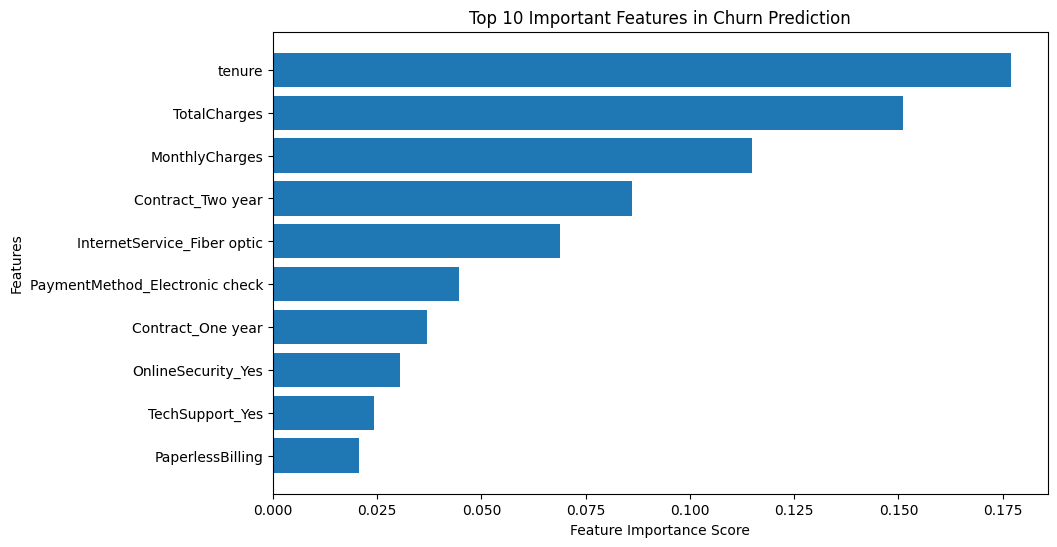

In [119]:
# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], top_importance[::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Churn Prediction")
plt.show()

# Implementing XGBoost for Churn Prediction

In [120]:
# Install and Import XGBoost
#!pip install xgboost

In [121]:
# Run the following command to update both libraries:
#!pip uninstall -y scikit-learn xgboost
#!pip install --no-cache-dir scikit-learn xgboost

In [122]:
# Convert boolean columns to integer (0/1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [123]:
# Convert data to numpy arrays before training
X_train_np = np.asarray(X_train, dtype=np.float32)
y_train_np = np.asarray(y_train, dtype=np.int32)

In [124]:
# Train XGboost Model
# Compute class weight (ratio of non-churn to churn cases)
# use scale_pos_weight to handle class imbalance:
scale_pos_weight = sum(y_train_np == 0) / sum(y_train_np == 1)

In [125]:
# Define the XGBoost model
model = XGBClassifier(
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.05,        # Smaller learning rate for better generalization
    max_depth=6,               # Depth of each tree (balanced for performance)
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

In [126]:
# Train the model
model.fit(X_train_np, y_train_np)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [127]:
import xgboost
import sklearn
print("XGBoost Version:", xgboost.__version__)
print("scikit-learn Version:", sklearn.__version__)

XGBoost Version: 2.1.3
scikit-learn Version: 1.6.1


In [128]:
print(X_train.head())
print(X_train.dtypes)

      SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738              0        0           0      35             0   
3151              0        1           1      15             1   
4860              0        1           1      13             0   
3867              0        1           0      26             1   
3810              0        1           1       1             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  gender_Male  \
3738                 0              49          1701            1   
3151                 0              75          1151            1   
4860                 0              40           590            1   
3867                 1              73          1905            0   
3810                 0              44            44            1   

      InternetService_Fiber optic  ...  OnlineBackup_No internet service  \
3738                            0  ...                                 0   
3151                            1  .